# Color Scheme Analysis of Popular Illustrations

##### created on 13/06/2020 by Niti Wattanasirichaigoon

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from os import listdir
from matplotlib.colors import rgb_to_hsv, hsv_to_rgb

### Load Dataset

In [2]:
# import images and preprocess
# (dataset can be found at https://www.kaggle.com/profnote/pixiv-popular-illustrations)
path = "D:/pixiv_og_11062020/" # path to local dir
file_names = listdir(path)
new_size = (224, 224)

imgs = []
processed = 0
for name in file_names:
    img = Image.open(path + name)
    img = img.convert("RGB")
    img = np.array(img.resize(new_size))
    imgs.append(img)
    processed += 1
    if processed % 500 == 0:
        print("processed", processed, "images")
    
imgs = np.array(imgs)

processed 500 images
processed 1000 images
processed 1500 images
processed 2000 images
processed 2500 images


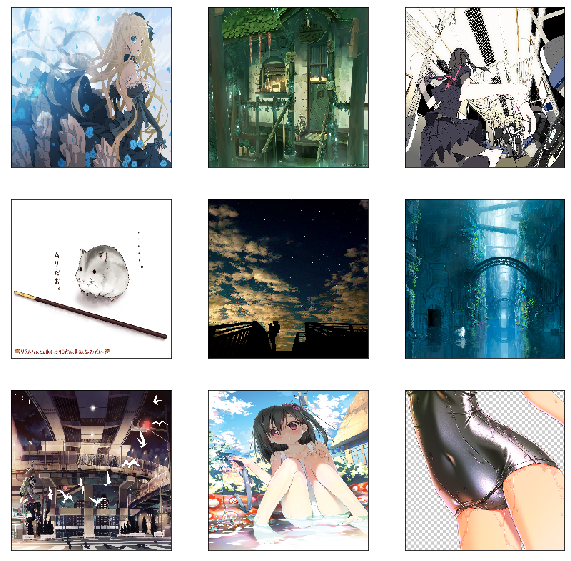

In [3]:
# visualize some images
plt.figure(figsize=(10,10))
for i in range(9) :
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imgs[i])

### Trends in Saturation and Brightness (Value)

In [32]:
# transform images from rgb into hsv
hsv_imgs = []
processed = 0
for img in imgs:
    hsv_img = rgb_to_hsv(img/255) #HSV values range = [0,1]
    hsv_imgs.append(hsv_img)
    processed += 1
    if processed % 500 == 0:
        print("processed", processed, "images")

processed 500 images
processed 1000 images
processed 1500 images
processed 2000 images
processed 2500 images


In [37]:
# Get average saturation and Value of each image
hsv_imgs = np.array(hsv_imgs)
saturation = np.mean(hsv_imgs[:,:,:,1], axis=(1,2))
Value = np.mean(hsv_imgs[:,:,:,2], axis=(1,2))
chroma = np.mean(hsv_imgs[:,:,:,1]*hsv_imgs[:,:,:,2], axis=(1,2))

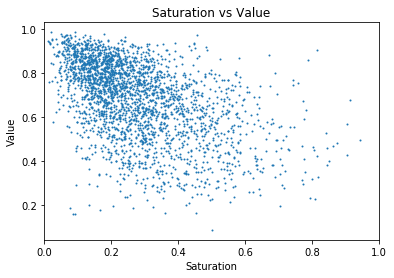

In [39]:
# Plot scatter plot
plt.plot(saturation, Value, marker='o', markersize=1, linewidth=0)
plt.title('Saturation vs Value')
plt.xlabel('Saturation')
plt.ylabel('Value')
plt.xlim(0,1)
plt.show()

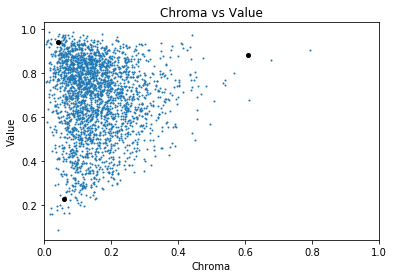

In [41]:
# Plot scatter plot - chroma
eg = [333, 493, 1400] #example illust
plt.plot(chroma, Value, marker='o', markersize=1, linewidth=0)
plt.plot(chroma[eg], Value[eg], marker='o', markersize=4, linewidth=0, color='black')
plt.title('Chroma vs Value')
plt.xlabel('Chroma')
plt.xlim(0,1)
plt.ylabel('Value')
plt.show()

### Color Clustering

#### K-Means clustering

In [4]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

img no. 2248
shape: (224, 224, 3)


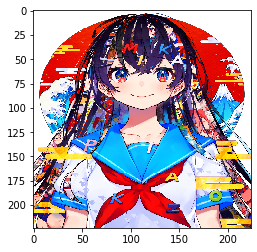

In [6]:
# get image index from file name (for testing)
#samples
# high sat high val e.g.: 46985381
# low sat high val e.g.: 40715238
# low val e.g.: 65822051
# mika pikazo e.g.: 76654781

id = 0
for i in range(len(file_names)):
    if '76654781' in file_names[i]:
        id = i
        
test_img = imgs[id]
print("img no.", id)
print("shape:", test_img.shape)

# view example image
plt.imshow(test_img)
plt.show()

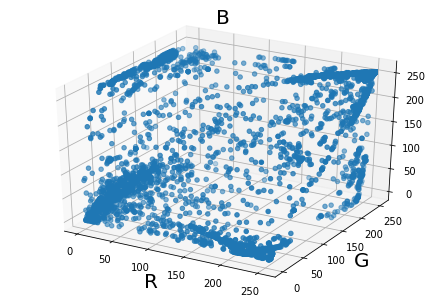

In [14]:
# plot pixels in RGB space 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(test_img[:,:,0][::10], test_img[:,:,1][::10], test_img[:,:,2][::10]) #plot every 10 pixels to save time
plt.xlabel('R', size=20)
plt.ylabel('G', size=20)
plt.title('B', size=20)
plt.show()

In [7]:
# K-means clustering
# code derived from https://buzzrobot.com/dominant-colors-in-an-image-using-k-means-clustering-3c7af4622036
class DominantColors:

    CLUSTERS = None
    IMAGE = None
    COLORS = None
    LABELS = None
    HEXCOLS = None
    
    def __init__(self, image, clusters=3):
        # image as numpy array (RGB)
        self.CLUSTERS = clusters
        self.IMAGE = image
        
        
    def dominantColors(self):
        img = self.IMAGE
        
        #reshaping to a list of pixels
        img = img.reshape((img.shape[0] * img.shape[1], 3))
        
        #save image after operations
        self.IMAGE = img
        
        #using k-means to cluster pixels
        kmeans = KMeans(n_clusters = self.CLUSTERS)
        kmeans.fit(img)
        
        #the cluster centers are our dominant colors.
        self.COLORS = kmeans.cluster_centers_
        
        #save labels
        self.LABELS = kmeans.labels_
        
        #returning after converting to integer from float
        return self.COLORS.astype(int)
    
    
    def rgb_to_hex(self, rgb):
        return '#%02x%02x%02x' % (int(rgb[0]), int(rgb[1]), int(rgb[2]))
    
    
    def plotClusters(self):
        self.HEXCOLS = [self.rgb_to_hex(i) for i in self.COLORS]
        
        fig = plt.figure()
        ax = Axes3D(fig)
        ind = 0
        for pix in range(self.IMAGE.shape[0]//10):
            ax.scatter(self.IMAGE[pix*10][0], self.IMAGE[pix*10][1], self.IMAGE[pix*10][2], color = self.HEXCOLS[self.LABELS[pix*10]])
            percent = 0
        plt.title('Color Clusters')
        plt.show()

In [8]:
# Color cluster our test img
clusters = 10
dc = DominantColors(test_img, clusters)
colors = dc.dominantColors()
print(colors)

[[ 63  46  92]
 [251 224 209]
 [ 17 183 252]
 [217  12   8]
 [195 124 140]
 [ 27  12  32]
 [249 209  52]
 [250 250 253]
 [ 19 101 226]
 [194 207 248]]


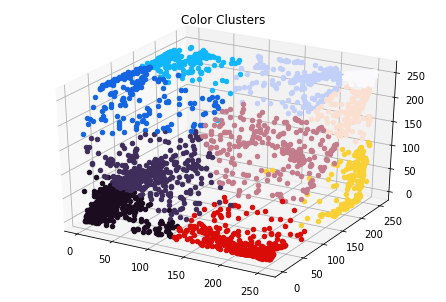

In [17]:
# View colored scatter plot
dc.plotClusters()

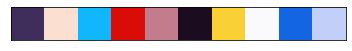

In [10]:
# function to visualize array of colors
def palette(colors):
    # input: array of RGB colors
    num_colors = len(colors)
    pal = np.zeros((100, 100 * num_colors, 3))
    for c in range(len(colors)):
        pal[:,c*100:c*100+100, 0] = colors[c][0]
        pal[:,c*100:c*100+100, 1] = colors[c][1]
        pal[:,c*100:c*100+100, 2] = colors[c][2]
    plt.xticks([])
    plt.yticks([])
    plt.imshow(pal/255)
    return 

palette(colors)

#### extcolors.py

In [10]:
pip install -U extcolors
# or might have to download and install manually

Requirement already up-to-date: extcolors in c:\users\asus\anaconda3\lib\site-packages (0.1.3)
Note: you may need to restart the kernel to use updated packages.


In [19]:
# function to visualize colors for extcolors.py
def palette2(colors):
    # input: 'colors' from extcolors (list of RGB values and its frequency)
    if len(colors) > 0:
        num_colors = len(colors)
        pal = np.zeros((100, 100 * num_colors, 3))
        for c in range(len(colors)):
            pal[:,c*100:c*100+100, 0] = colors[c][0][0]
            pal[:,c*100:c*100+100, 1] = colors[c][0][1]
            pal[:,c*100:c*100+100, 2] = colors[c][0][2]
        plt.xticks([])
        plt.yticks([])
        plt.imshow(pal/255)
    return

In [20]:
import extcolors
PIL_image = Image.fromarray(np.uint8(test_img)).convert('RGB')
colors2, pixel_count = extcolors.extract_from_image(PIL_image, tolerance=25, limit=10)
print(colors2)

[((255, 255, 255), 21496), ((222, 4, 0), 4894), ((9, 193, 255), 4584), ((21, 11, 37), 4278), ((53, 36, 148), 2549), ((35, 96, 186), 2092), ((225, 128, 134), 1673), ((65, 64, 67), 991), ((241, 25, 16), 961), ((168, 0, 28), 925)]


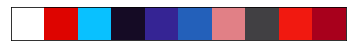

In [21]:
# visualize pallette
palette2(colors2)

#### colorgram.py

In [241]:
pip install colorgram.py

Note: you may need to restart the kernel to use updated packages.


In [26]:
import colorgram

# Extract 6 colors from an image.
colors3 = colorgram.extract(path + '76654781_p0.png', 10)

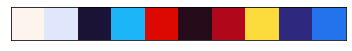

In [27]:
# visualize color palette
npcolors = np.zeros((10, 3))
for col in range(len(colors3)):
    for chan in range(3):
        npcolors[col, chan] = colors3[col].rgb[chan]
palette(npcolors)

### Selecting the main colors
#### Cut off low chroma colors and group the remaining colors to the corresponding colors on the RGB color wheel

In [11]:
# define functions
TOLERANCE = 1.0

def getMainColors(colors_arr, tolerance):
    if len(colors_arr) == 0:
        return
    hsv_colors = rgb_to_hsv(colors_arr/255)
    chroma = hsv_colors[:,1] * hsv_colors[:,2]
    tolerance = tolerance
    cutoff = chroma.mean() - chroma.std() * tolerance
    to_remove = []
    
    for i in range(len(chroma)):
        #print(hsv_colors[i,0]*360) #display hue degrees
        if chroma[i] < cutoff:
            to_remove.append(i)
            
    mainColors = np.delete(colors_arr, to_remove, axis=0)
    return mainColors


def colorsOnWheel(colors_arr):
    # Outputs an array of presence of colors on the RGB color wheel up to tertiary colors (12-split)
    # Red=0,...,Green=4,...,Blue=8
    
    if len(colors_arr) == 0:
        return
    hues = rgb_to_hsv(colors_arr/255)[:,0]
    wheel = [0]*12
    for i in range(len(hues)):
        for c in range(12):
            lb = c*1/12 - 1/24
            ub = c*1/12 + 1/24
            if lb < hues[i] < ub:
                wheel[c] = 1
        if hues[i] > 11/12: 
            # if red > 345 degrees
            wheel[0] = 1
    return wheel

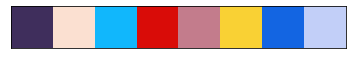

In [12]:
# get main colors of test_img
mainCols = getMainColors(colors, TOLERANCE)
palette(mainCols)

In [13]:
# get the corresponding colors on the RGB wheel
wheel = colorsOnWheel(mainCols)
wheel

[1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0]

### Classifying Algorithms

In [14]:
# get color harmony from mainColors
def getHarmony(wheelColors):
    # Get the corresponding colors on the RGB wheel from array of RGB colors
    w = wheelColors
    harmonies = np.array([monochromatic(w), complementary(w), splitComplementary(w), triad(w), square(w), rectangular(w), analogous(w), False]) * 1
    
    # If other color combinations
    if sum(w) > 1 and sum(harmonies)==0:
        harmonies[-1] = 1
    return harmonies
    
# Harmonies    
def monochromatic(wheelColors):
    return sum(wheelColors)==1


def complementary(wheelColors):
    for curr in range(12):
        opp = (curr+6) % 12
        if wheelColors[curr]==1 and wheelColors[opp]==1:
            return True
    return False


def splitComplementary(wheelColors):
    for curr in range(12):
        opp_left = (curr+5) % 12
        opp_right = (curr+7) % 12
        if wheelColors[curr]==1 and wheelColors[opp_left]==1 and wheelColors[opp_right]==1:
            return True
    return False


def triad(wheelColors):
    for curr in range(12):
        left = (curr+4) % 12
        right = (curr+8) % 12
        if wheelColors[curr]==1 and wheelColors[left]==1 and wheelColors[right]==1:
            return True
    return False


def square(wheelColors):
    for curr in range(12):
        left = (curr+3) % 12
        right = (curr+9) % 12
        opp = (curr+6) % 12
        if wheelColors[curr]==1 and wheelColors[left]==1 and wheelColors[right]==1 and wheelColors[opp]==1:
            return True
    return False


def rectangular(wheelColors):
    for curr in range(6):
        for width in range(1,3):
            left = (curr+width) % 12
            right = (curr+6+width) % 12
            opp = (curr+6) % 12
            if wheelColors[curr]==1 and wheelColors[left]==1 and wheelColors[right]==1 and wheelColors[opp]==1:
                return True
    return False


def analogous(wheelColors):
    for curr in range(12):
        right = (curr+1) % 12
        if wheelColors[curr]==1 and wheelColors[right]==1:
            return True
    return False

In [16]:
# Display harmonies of test_img
labels = ["Monochromatic", "Complementary", "Split Complementary", "Triad", "Square", "Rectangular", "Analogous", "Other"]
harmony = getHarmony(wheel)
for i in range(len(harmony)):
    if harmony[i]: 
        print(labels[i])

Complementary
Split Complementary
Rectangular
Analogous


### Label the dataset, study Harmony and Hue Distributions

In [13]:
# Find color harmonies of every illustration in our dataset
# If cloned Github repo, you should have the csv files ready to read --> skip to load saved files

# WARNING: takes ~ 3 hours for whole dataset
def analyzeImg(img):
    dc = DominantColors(img, clusters) 
    colors = dc.dominantColors()
    mainColors = getMainColors(colors)
    harmony, wheelColors = getHarmony(mainColors)
    return harmony, mainColors, wheelColors
    
processed = 0
clusters = 10
harmonies = []
wheelColors_arr = []

for img in imgs:
    harmony, mainColors, wheelColors = analyzeImg(img)
    harmonies.append(harmony)
    wheelColors_arr.append(wheelColors)
    processed += 1
    if processed % 200 == 0:
        print("processed", processed, "images")

processed 200 images
processed 400 images
processed 600 images
processed 800 images
processed 1000 images
processed 1200 images
processed 1400 images
processed 1600 images
processed 1800 images
processed 2000 images
processed 2200 images
processed 2400 images


In [16]:
# convert to numpy arrays
harmonies = np.array(harmonies)
wheelColors_arr = np.array(wheelColors_arr)

In [28]:
# save files as csv
np.savetxt("harmonies.csv", harmonies.astype(int), delimiter=',')
np.savetxt("wheelColors_arr.csv", wheelColors_arr.astype(int), delimiter=',')

In [33]:
# load saved files
harmonies = np.genfromtxt('harmonies.csv', delimiter=',')
wheelColors_arr = np.genfromtxt('wheelColors_arr.csv', delimiter=',')

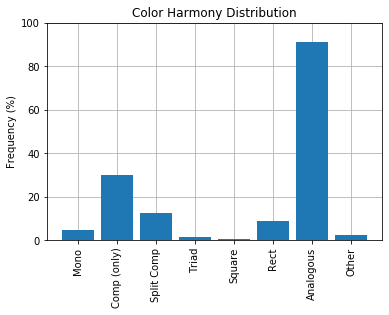

In [34]:
# plot frequencies
labels = ["Mono", "Comp (only)", "Split Comp", "Triad", "Square", "Rect", "Analogous", "Other"]
freq = np.sum(harmonies, axis=0) * 100 / 2551
freq[1] -= freq[4] + freq[5] # remove complementaries that we counted as rect & square

plt.bar(labels, freq, zorder=3)
plt.grid(zorder=0)
plt.title("Color Harmony Distribution")
plt.ylabel("Frequency (%)")
plt.ylim(0, 100)
plt.xticks(rotation='vertical')
plt.show()

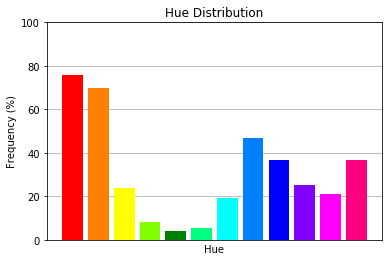

In [35]:
# plot frequencies
hue = range(0, 12)
bar_colors = ('r',(1,0.5,0),(1,1,0),(0.5,1,0),'g',(0,1,0.5),(0,1,1),(0,0.5,1),'b',(0.5,0,1),(1,0,1),(1,0,0.5))
freq = np.sum(wheelColors_arr, axis=0) * 100 / 2551
plt.bar(hue, freq, color=bar_colors, zorder=3)
plt.grid(zorder=0)
plt.title("Hue Distribution")
plt.ylabel("Frequency (%)")
plt.ylim(0, 100)
plt.xticks([])
plt.xlabel("Hue")
plt.show()